In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.path.insert(0, '../scripts')
from utils import *

In [79]:
import gensim
from gensim.models import word2vec, Word2Vec

In [80]:
plt.rcParams['figure.figsize'] = (12, 10)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
def get_average_embeddings_w2v(q1, q2):
    vecs_q1 = []
    vecs_q2 = []

    for i, j in zip(q1, q2):
        vecs_q1.append(sum(model.word_vec(x) if x in model.vocab else np.zeros(300) for x in i))
        vecs_q2.append(sum(model.word_vec(x) if x in model.vocab else np.zeros(300) for x in j))
        
    vecs_q1, vecs_q2 = np.array(vecs_q1), np.array(vecs_q2)
    w2v_dist = (vecs_q1 - vecs_q2)**2
    w2v_avg_dist = np.mean(w2v_dist, axis=1)
    return w2v_avg_dist

In [83]:
train_data = pd.read_csv('../data/clean-train.csv').dropna(axis=0)
test_data = pd.read_csv('../data/clean-test.csv').dropna(axis=0)

In [84]:
q1_list = train_data['q1'].str.split(' ').values.tolist()
q2_list = train_data['q2'].str.split(' ').values.tolist()

In [86]:
q1_list_test = test_data['q1'].str.split(' ').values.tolist()
q2_list_test = test_data['q2'].str.split(' ').values.tolist()

## Word2Vec Embeddings

In [87]:
model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)

In [88]:
w2v_avg_dist = get_average_embeddings_w2v(q1_list, q2_list)
w2v_avg_dist_test = get_average_embeddings_w2v(q1_list_test, q2_list_test)

In [89]:
w2v_train_df = pd.DataFrame(data={'avg_dist': w2v_avg_dist, 'is_same': train_data['is_same']})

/Users/maded/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  


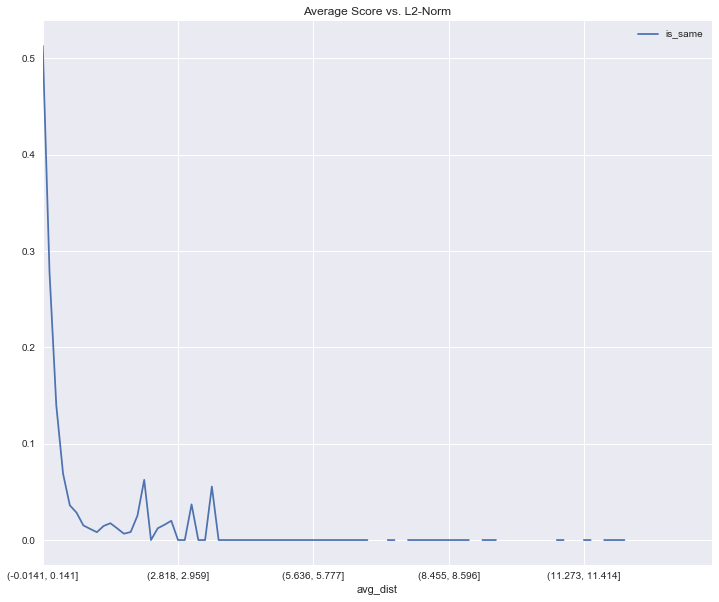

In [90]:
ax = pd.groupby(w2v_train_df, pd.cut(w2v_train_df['avg_dist'],
                                100))[['is_same']].mean().plot(title='Average Score vs. L2-Norm')
plt.savefig('../images/l2w2v.png')

In [91]:
log_w2v = LogisticRegression(class_weight='balanced')
log_w2v.fit(w2v_df['avg_dist'][:, np.newaxis], w2v_df['is_same'][:, np.newaxis]);

/Users/maded/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
generate_report(test_data['is_same'], log_w2v.predict(w2v_avg_dist_test[:, np.newaxis]),
                    log_w2v.predict_proba(w2v_avg_dist_test[:, np.newaxis])[:, 1])

Loss Report
-----------

Accuracy Score: 0.6206
ROC  AUC Score: 0.7255
Log Loss Score: 0.6190


(0.62058772602468648, 0.7255169754496883, 0.6190482720563677)

## GloVe Embeddings

In [106]:
from gensim.scripts import glove2word2vec

In [ ]:
glove_model = gensim.models.KeyedVectors.load_word2vec_format('../data/glove.w2v.txt')

In [ ]:
glove_vecs_q1 = []
glove_vecs_q2 = []

for i, j in zip(q1_list, q2_list):
    glove_vecs_q1.append(sum(glove_model.word_vec(x) if x in glove_model.vocab else np.zeros(300) for x in i))
    glove_vecs_q2.append(sum(glove_model.word_vec(x) if x in glove_model.vocab else np.zeros(300) for x in j))

glove_vecs_q1, glove_vecs_q2 = np.array(glove_vecs_q1), np.array(glove_vecs_q2)
glove_dist = (glove_vecs_q1 - glove_vecs_q2)**2
glove_avg_dist = np.mean(glove_dist, axis=1)

In [ ]:
glove_vecs_q1_test = []
glove_vecs_q2_test = []

for i, j in zip(q1_list_test, q2_list_test):
    glove_vecs_q1_test.append(sum(glove_model.word_vec(x) if x in glove_model.vocab else np.zeros(300) for x in i))
    glove_vecs_q2_test.append(sum(glove_model.word_vec(x) if x in glove_model.vocab else np.zeros(300) for x in j))

glove_vecs_q1_test, glove_vecs_q2_test = np.array(glove_vecs_q1_test), np.array(glove_vecs_q2_test)
glove_dist_test = (glove_vecs_q1_test - glove_vecs_q2_test)**2
glove_avg_dist_test = np.mean(glove_dist_test, axis=1)

In [ ]:
glove_train_df = pd.DataFrame(data={'glove_avg_dist': w2v_avg_dist, 'is_same': train_data['is_same']})

In [ ]:
ax = pd.groupby(glove_train_df, pd.cut(glove_train_df['avg_dist'],
                                100))[['is_same']].mean().plot(title='Average Score vs. L2-Norm in GloVe Space')
plt.savefig('../images/l2w2v.png')

In [ ]:
log_glove = LogisticRegression(class_weight='balanced')
log_glove.fit(glove_train_df['avg_dist'][:, np.newaxis], glove_train_df['is_same'][:, np.newaxis]);

In [ ]:
generate_report(test_data['is_same'], log_glove.predict(glove_avg_dist_test[:, np.newaxis]),
                    log_glove.predict_proba(glove_avg_dist_test[:, np.newaxis])[:, 1])